In [2]:
#@title #Task 1: Read the dataset and do data pre-processing
# import the necessery libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#read the dataset
df = pd.read_csv('/content/Dataset/drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [5]:
# To get last five observations
df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [ ]:
#To get exact count of the null value fields
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
df.describe(include='all') # descriptive statistics

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [7]:
#For categorical columns
df.Sex.unique()

array(['F', 'M'], dtype=object)

In [8]:
df.BP.unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [9]:
df.Drug.unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [10]:
df.Cholesterol.unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [11]:
df.Drug.value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [ ]:
#Checking for outliers


In [12]:
names = ['Age','Na_to_K']
names

['Age', 'Na_to_K']

In [13]:
enumerate(names)

In [14]:
for i,j in enumerate(names):
  print(i,j)
     

0 Age
1 Na_to_K


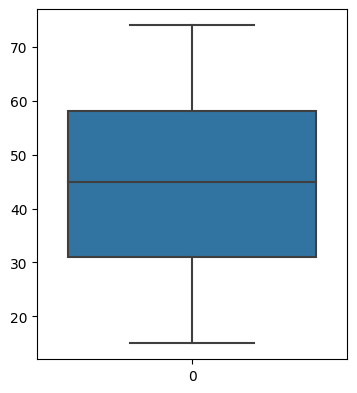

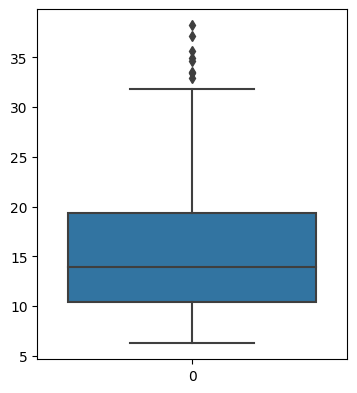

In [15]:
for i,j in enumerate(names):
  plt.figure(figsize=(4,10))
  plt.subplot(2,1,i+1)
  sns.boxplot(df[j])
     

<Axes: >

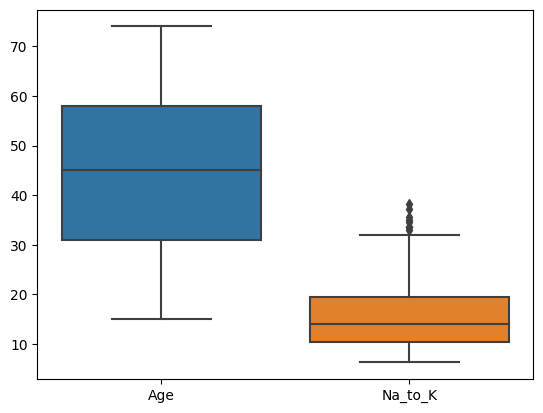

In [16]:
sns.boxplot(df)

<Axes: >

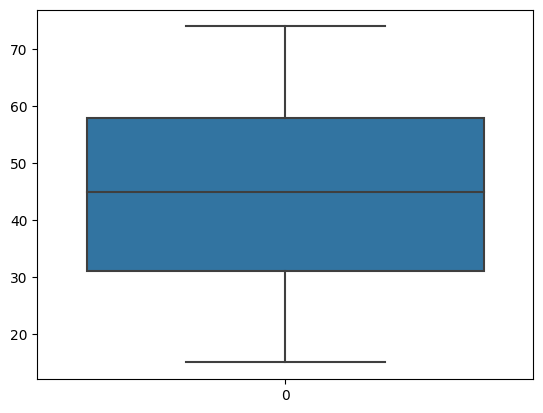

In [17]:
sns.boxplot(df.Age)

<Axes: >

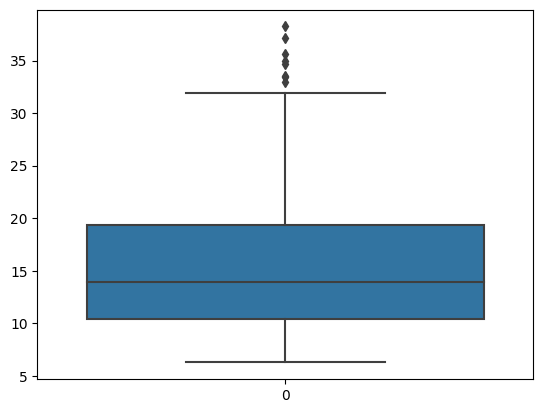

In [18]:
sns.boxplot(df.Na_to_K)

In [ ]:
#Only Na_to_k has outliers

In [19]:
#To remove the outliers present 
#we use inter quatile range 
Q1 = df.Na_to_K.quantile(0.25)
print('Q1 = ', Q1)
Q3 = df.Na_to_K.quantile(0.75)
print('Q3 = ', Q3)
IQR = Q3 - Q1
print('IQR = ', IQR)
upperlimit = Q3 + (1.5*IQR)
print('Upperlimit = ', upperlimit)
lowerlimit = Q1- 1.5*IQR
print('Lowerlimit = ', lowerlimit)


Q1 =  10.4455
Q3 =  19.38
IQR =  8.9345
Upperlimit =  32.78175
Lowerlimit =  -2.9562500000000007


In [20]:
#Calculate the median

median = df['Na_to_K'].median()
median

13.9365

In [21]:
#Replace the value with median

df['Na_to_K']=np.where(df['Na_to_K']>31,13.93,df["Na_to_K"])

<Axes: >

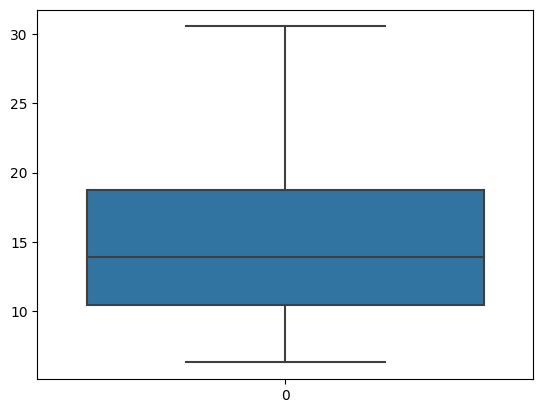

In [23]:
#Checking outliers

sns.boxplot(df.Na_to_K)

In [22]:
df.shape

(200, 6)

In [24]:
###Splitting the dataset into training and testing data

df 

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
#step:1 split the dependent and the independent variable of the dataset 

In [25]:
# dependent variable x (input variable)
x=df.iloc[:,0:5]
x.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [26]:
# independent variable y (output variable)
y=df['Drug']
y[0:2]

0    DrugY
1    drugC
Name: Drug, dtype: object

In [27]:
#Before splitting the training and the testing data we have to do encoding

#import necessary lib
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 12)

In [28]:
#Here one hot encoding is used because here many number of categorical values are involved in the dataset  

In [29]:
xtrain = pd.get_dummies(xtrain)
xtest = pd.get_dummies(xtest)

In [30]:
xtrain.head()

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
62,67,20.693,0,1,0,1,0,0,1
6,49,16.275,1,0,0,0,1,1,0
199,40,11.349,1,0,0,1,0,0,1
124,53,12.495,1,0,1,0,0,0,1
145,61,9.443,0,1,0,0,1,1,0


In [31]:
xtest.head()

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
23,48,15.036,1,0,0,1,0,1,0
182,20,11.686,1,0,0,1,0,0,1
172,39,17.225,1,0,0,0,1,0,1
21,63,25.917,0,1,0,0,1,1,0
63,45,8.370,0,1,0,1,0,0,1


In [32]:
ytrain = pd.get_dummies(ytrain)
ytest = pd.get_dummies(ytest)

In [33]:
ytrain.head(2)

,DrugY,drugA,drugB,drugC,drugX
62,1,0,0,0,0
6,1,0,0,0,0


In [34]:
ytest.head()

,DrugY,drugA,drugB,drugC,drugX
23,1,0,0,0,0
182,0,0,0,0,1
172,1,0,0,0,0
21,1,0,0,0,0
63,0,0,0,0,1


In [35]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [36]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((140, 9), (60, 9), (140, 5), (60, 5))

In [37]:
#@title #Task 2: : Build the ANN model with (input layer, min 3 hidden layers & output layer)


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [38]:
# Create the model
model = Sequential()

# Add the input layer and first hidden layer
model.add(Dense(48, input_shape=(xtrain.shape[1],), activation='relu'))

# Add additional hidden layers
model.add(Dense(36, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(12, activation='relu'))


# Add the output layer
model.add(Dense(ytrain.shape[1], activation='softmax'))



In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 48)                480       
                                                                 
 dense_1 (Dense)             (None, 36)                1764      
                                                                 
 dense_2 (Dense)             (None, 24)                888       
                                                                 
 dense_3 (Dense)             (None, 12)                300       
                                                                 
 dense_4 (Dense)             (None, 5)                 65        
                                                                 
Total params: 3,497
Trainable params: 3,497
Non-trainable params: 0
_________________________________________________________________


In [41]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
# Train the model 
model.fit(xtrain, ytrain, epochs=15, batch_size=5, validation_data=(xtest, ytest))

Epoch 1/15
28/28 [==============================] - 2s 23ms/step - loss: 2.0248 - accuracy: 0.2357 - val_loss: 1.5121 - val_accuracy: 0.4667
Epoch 2/15
28/28 [==============================] - 0s 7ms/step - loss: 1.3713 - accuracy: 0.4286 - val_loss: 1.4027 - val_accuracy: 0.4500
Epoch 3/15
28/28 [==============================] - 0s 7ms/step - loss: 1.2268 - accuracy: 0.4571 - val_loss: 1.3081 - val_accuracy: 0.4500
Epoch 4/15
28/28 [==============================] - 0s 8ms/step - loss: 1.1730 - accuracy: 0.4571 - val_loss: 1.2425 - val_accuracy: 0.4500
Epoch 5/15
28/28 [==============================] - 0s 7ms/step - loss: 1.1801 - accuracy: 0.4571 - val_loss: 1.2751 - val_accuracy: 0.4500
Epoch 6/15
28/28 [==============================] - 0s 7ms/step - loss: 1.1420 - accuracy: 0.4571 - val_loss: 1.1904 - val_accuracy: 0.4500
Epoch 7/15
28/28 [==============================] - 0s 8ms/step - loss: 1.1035 - accuracy: 0.5143 - val_loss: 1.1966 - val_accuracy: 0.5333
Epoch 8/15
28/28 [=

In [43]:
#evaluate the model 
test_loss, test_acc=model.evaluate(xtest, ytest)
print('Test accuracy:', test_acc * 100)

2/2 [==============================] - 0s 8ms/step - loss: 1.1550 - accuracy: 0.6333
Test accuracy: 63.333332538604736


**TESTING THE MODEL**

In [44]:
#@title #Task 2: : Test the model with random data
ypred = model.predict(xtest)

2/2 [==============================] - 0s 6ms/step


In [46]:
from operator import index
## Comparing predicted with the actual value
ypred = np.argmax(ypred, axis=1) 

comp = pd.DataFrame({'Actual Value': np.argmax(ytest.values, axis=1),
                     'Predicted Values': ypred})
print(comp)


    Actual Value  Predicted Values
0              0                 0
1              4                 0
2              0                 0
3              0                 0
4              4                 4
5              0                 0
6              1                 0
7              4                 4
8              0                 0
9              3                 4
10             4                 0
11             0                 0
12             4                 0
13             0                 0
14             0                 0
15             2                 4
16             2                 4
17             4                 4
18             4                 4
19             2                 4
20             0                 0
21             0                 0
22             1                 4
23             4                 4
24             4                 4
25             4                 4
26             4                 4
27             0    

In [47]:
#Predict the output with random value 

model.predict([[45, 8.370,	0,	1,	0,	1,	0,	0,	1]])

1/1 [==============================] - 0s 100ms/step


array([[0.18755211, 0.19235142, 0.19490235, 0.19977987, 0.22541425]],
      dtype=float32)

In [48]:
df.Drug

0      DrugY
1      drugC
2      drugC
3      drugX
4      DrugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object